In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
#Load data
data = pd.read_csv(r'C:\Users\g.davoulos\Downloads\Dataset2\DogMoveData_csv_format_2\DogMoveData_merged_2.csv')

In [3]:
feature_cols = ['ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x', 'GNeck_y', 'GNeck_z']
X = data[feature_cols]  # Features
y = data['Behavior']  # Target variable

# Convert the target variable to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training set and test set
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=1)  # 70% training and 30% test

# Convert numerical labels to one-hot encoded vectors (for multi-class classification)
num_classes = len(label_encoder.classes_)
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)


In [4]:
# Define the CNN model
model = tf.keras.Sequential([
    layers.Reshape(target_shape=(12, 1), input_shape=(12, )),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping to prevent overfitting and monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Set up ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with early stopping and learning rate reduction
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr], verbose=1)


Epoch 1/10
118829/118829 [==============================] - 588s 5ms/step - loss: 0.4443 - accuracy: 0.8360 - val_loss: 0.3373 - val_accuracy: 0.8772 - lr: 0.0010
Epoch 2/10
118829/118829 [==============================] - 587s 5ms/step - loss: 0.3736 - accuracy: 0.8673 - val_loss: 0.3295 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 3/10
118829/118829 [==============================] - 631s 5ms/step - loss: 0.3644 - accuracy: 0.8714 - val_loss: 0.3270 - val_accuracy: 0.8827 - lr: 0.0010
Epoch 4/10
  9777/118829 [=>............................] - ETA: 9:10 - loss: 0.3608 - accuracy: 0.8736 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



118829/118829 [==============================] - 618s 5ms/step - loss: 0.3579 - accuracy: 0.8743 - val_loss: 0.3083 - val_accuracy: 0.8894 - lr: 0.0010
Epoch 5/10
118829/118829 [==============================] - 599s 5ms/step - loss: 0.3551 - accuracy: 0.8758 - val_loss: 0.3188 - val_accuracy: 0.8863 - lr: 0.0010
Epoch 6/10
118829/118829 [==============================] - 583s 5ms/step - loss: 0.3527 - accuracy: 0.8774 - val_loss: 0.2993 - val_accuracy: 0.8940 - lr: 0.0010
Epoch 8/10
118829/118829 [==============================] - 574s 5ms/step - loss: 0.3522 - accuracy: 0.8780 - val_loss: 0.3113 - val_accuracy: 0.8905 - lr: 0.0010
Epoch 9/10
118829/118829 [==============================] - 574s 5ms/step - loss: 0.3498 - accuracy: 0.8786 - val_loss: 0.2992 - val_accuracy: 0.8921 - lr: 0.0010
Epoch 10/10
  3122/118829 [..............................] - ETA: 8:20 - loss: 0.3463 - accuracy: 0.8797 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



118829/118829 [==============================] - 570s 5ms/step - loss: 0.3508 - accuracy: 0.8789 - val_loss: 0.3137 - val_accuracy: 0.8903 - lr: 0.0010


56586/56586 [==============================] - 121s 2ms/step


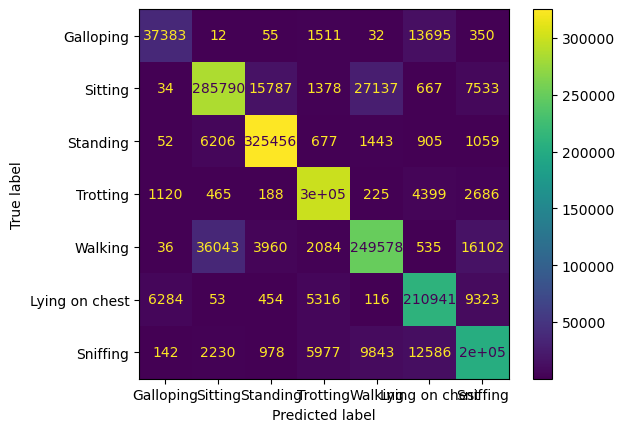

                precision    recall  f1-score   support

     Galloping       0.83      0.70      0.76     53038
       Sitting       0.86      0.84      0.85    338326
      Standing       0.94      0.97      0.95    335798
      Trotting       0.95      0.97      0.96    307886
       Walking       0.87      0.81      0.84    308338
Lying on chest       0.87      0.91      0.89    232487
      Sniffing       0.85      0.86      0.86    234851

      accuracy                           0.89   1810724
     macro avg       0.88      0.87      0.87   1810724
  weighted avg       0.89      0.89      0.89   1810724



In [5]:
# Predict labels on the test data
y_pred_prob = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking','Lying on chest', 'Sniffing'])
disp.plot()
plt.show()

# Print classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking','Lying on chest', 'Sniffing']))